<a href="https://colab.research.google.com/github/pallmallking/lettuce/blob/main/Copy_of_Lettuce_Dataset_EDA%2C_Cleaning%2C_and_Visualization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [15]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


--- Loading the Dataset ---
Dataset loaded successfully!
Dataset shape: (3169, 7)

--- Exploratory Data Analysis (EDA) ---

First 5 rows of the dataset:

DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3169 entries, 0 to 3168
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Plant_ID          3169 non-null   int64  
 1   Date              3169 non-null   object 
 2   Temperature (°C)  3169 non-null   float64
 3   Humidity (%)      3169 non-null   int64  
 4   TDS Value (ppm)   3169 non-null   int64  
 5   pH Level          3169 non-null   float64
 6   Growth Days       3169 non-null   int64  
dtypes: float64(2), int64(4), object(1)
memory usage: 173.4+ KB

Descriptive Statistics:
          Plant_ID  Temperature (°C)  Humidity (%)  TDS Value (ppm)  \
count  3169.000000       3169.000000   3169.000000      3169.000000   
mean     35.441780         28.142222     64.873462       598.045440   

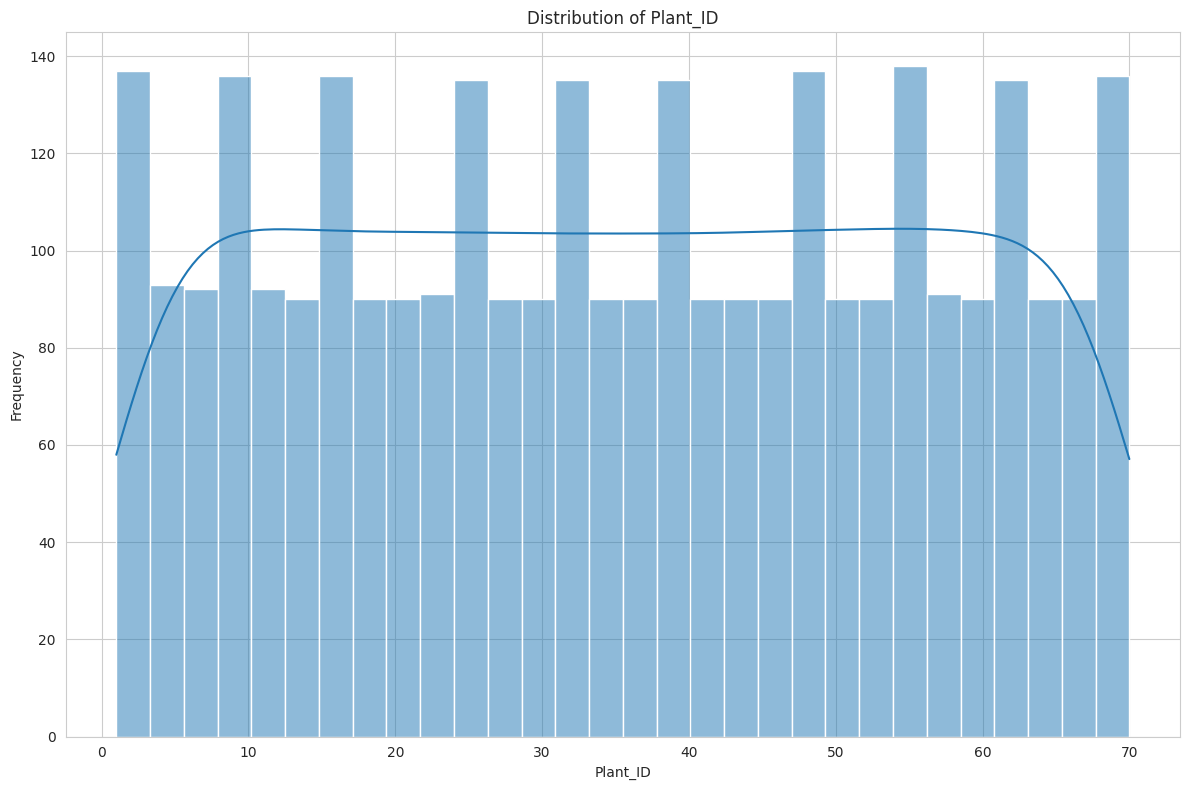

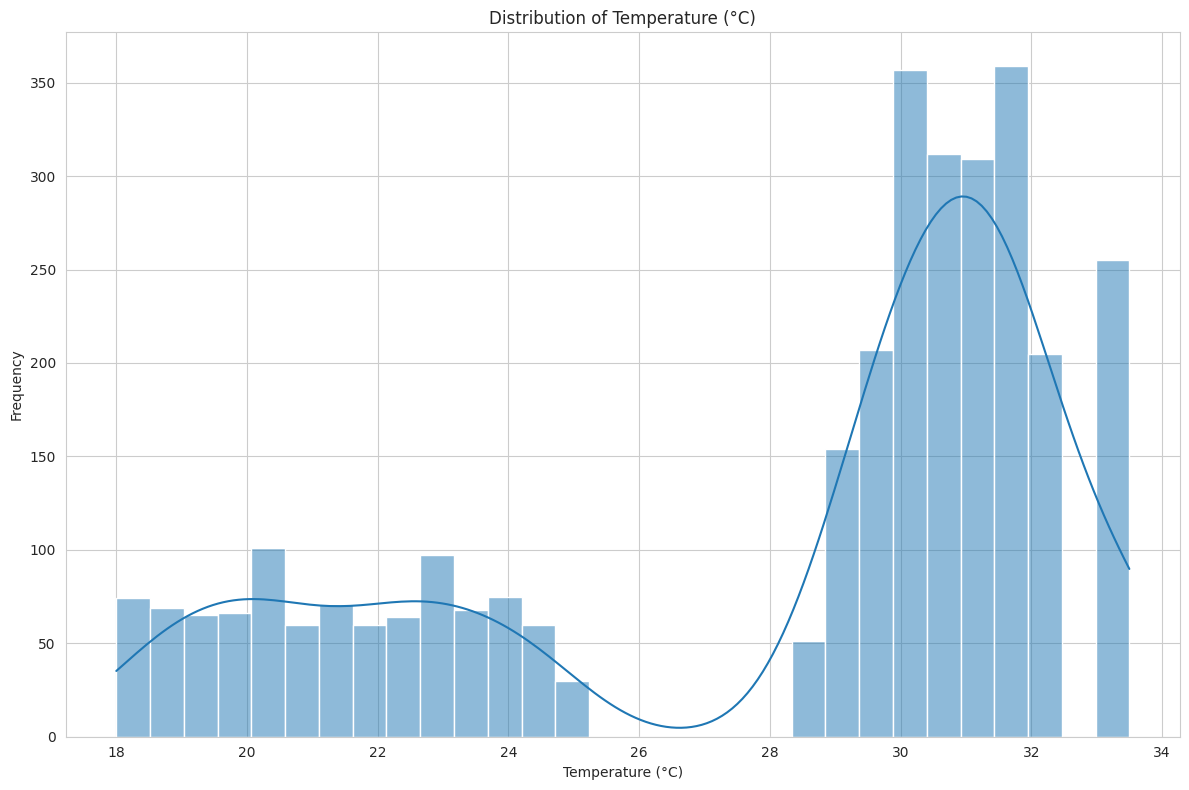

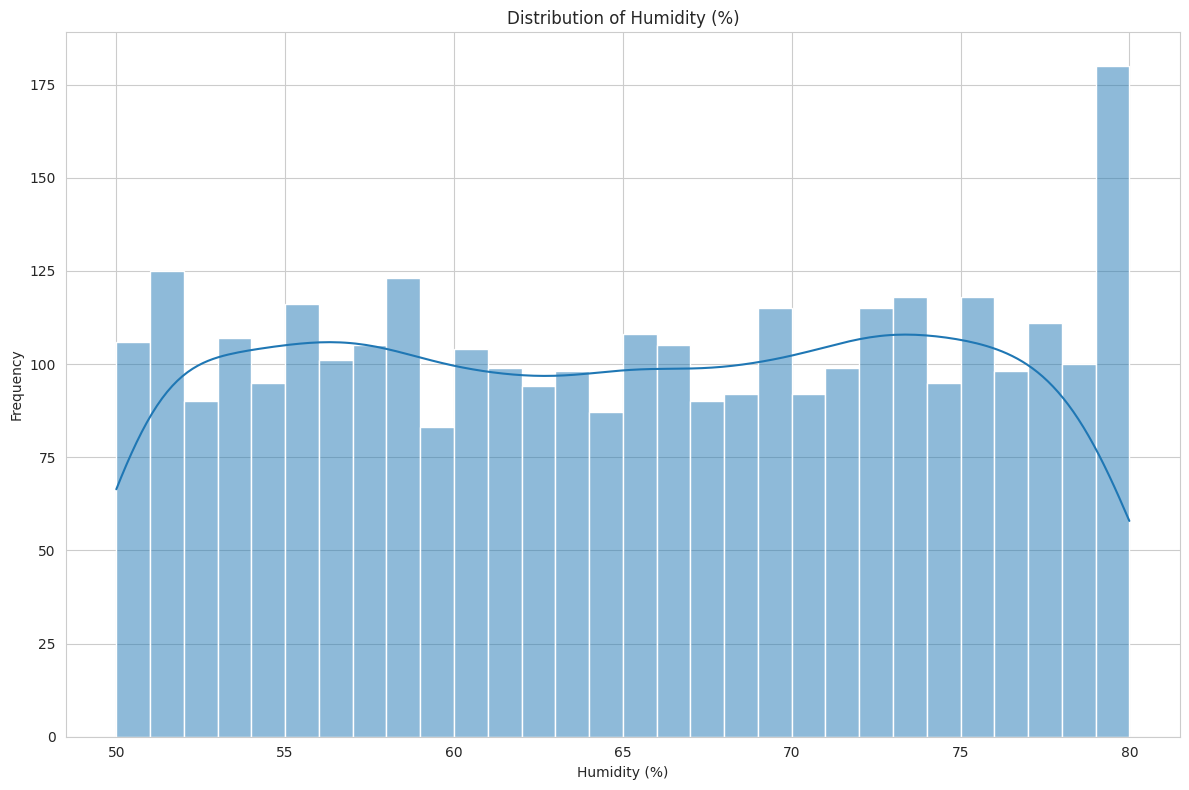

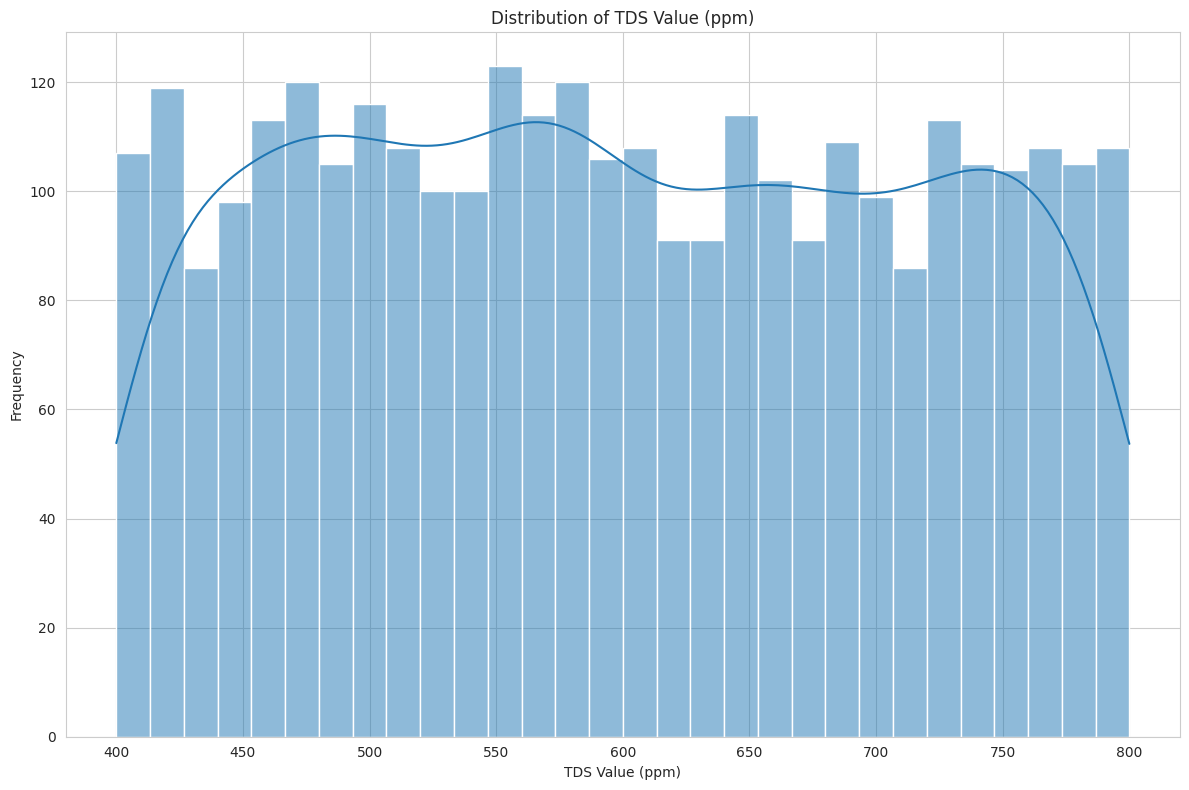

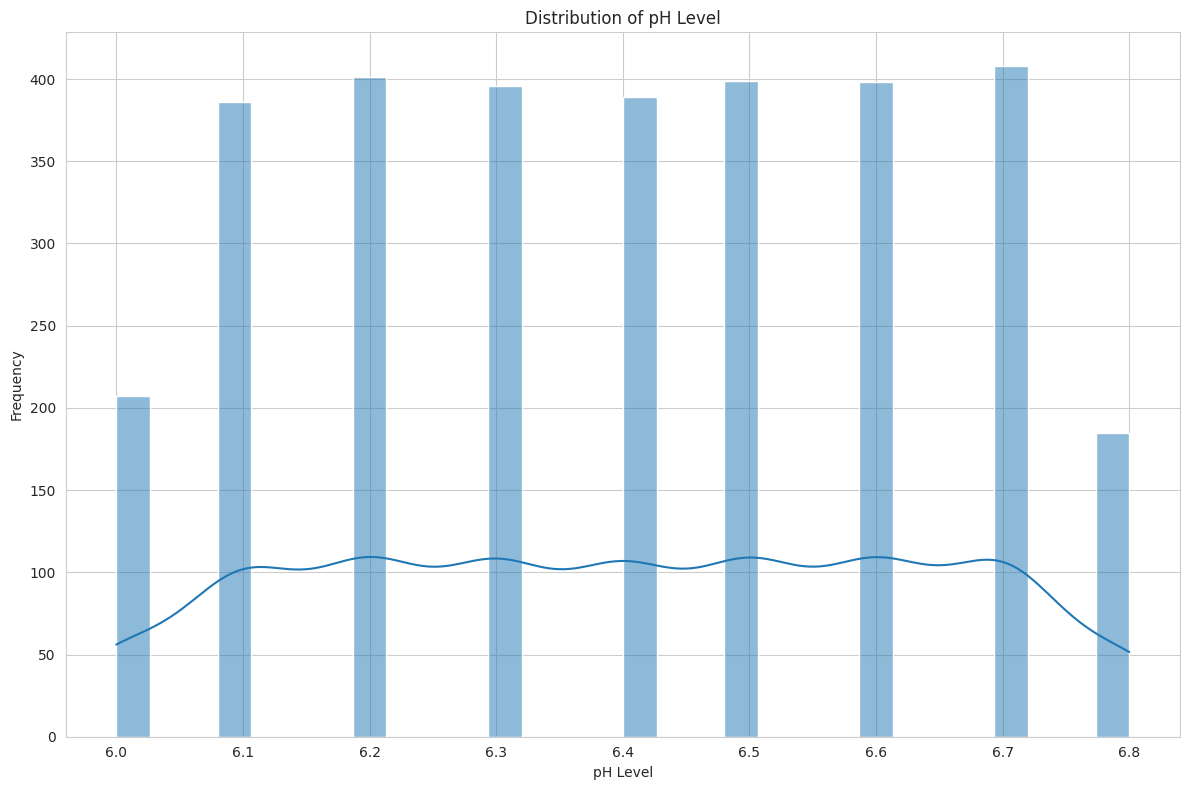

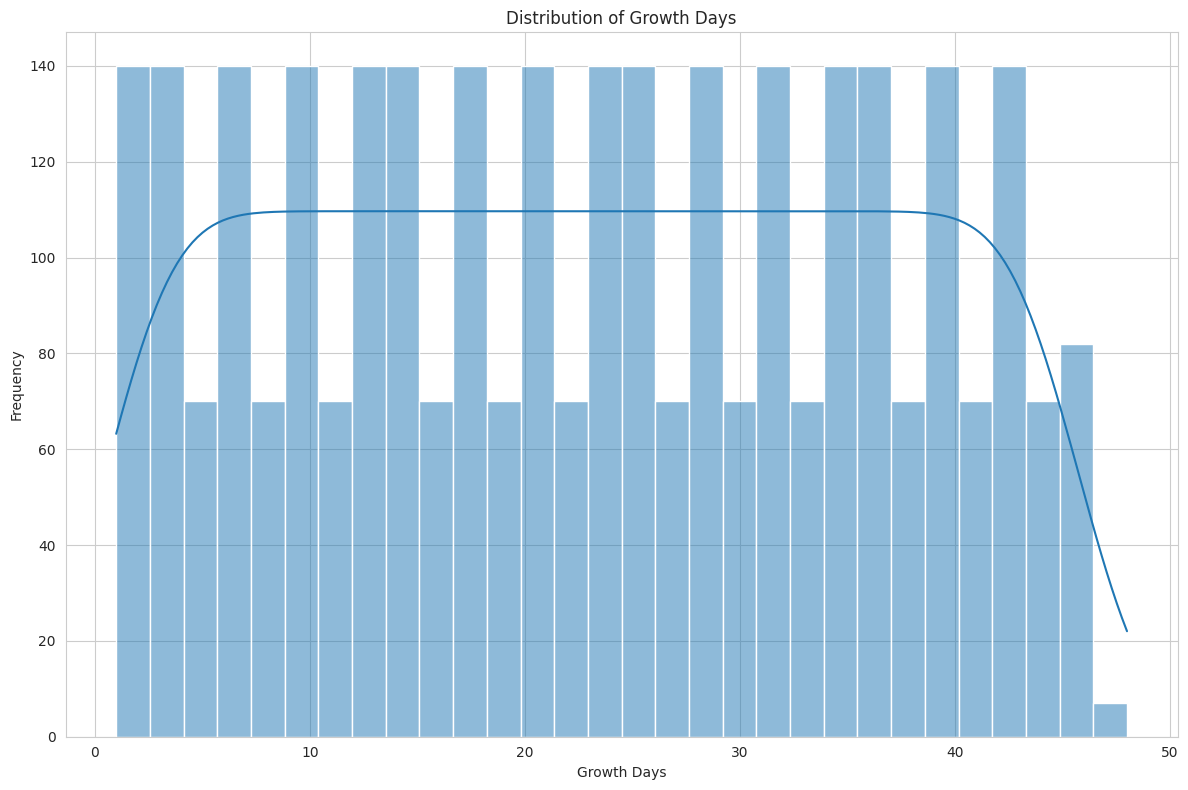


Creating box plots for numerical features (to identify outliers)...


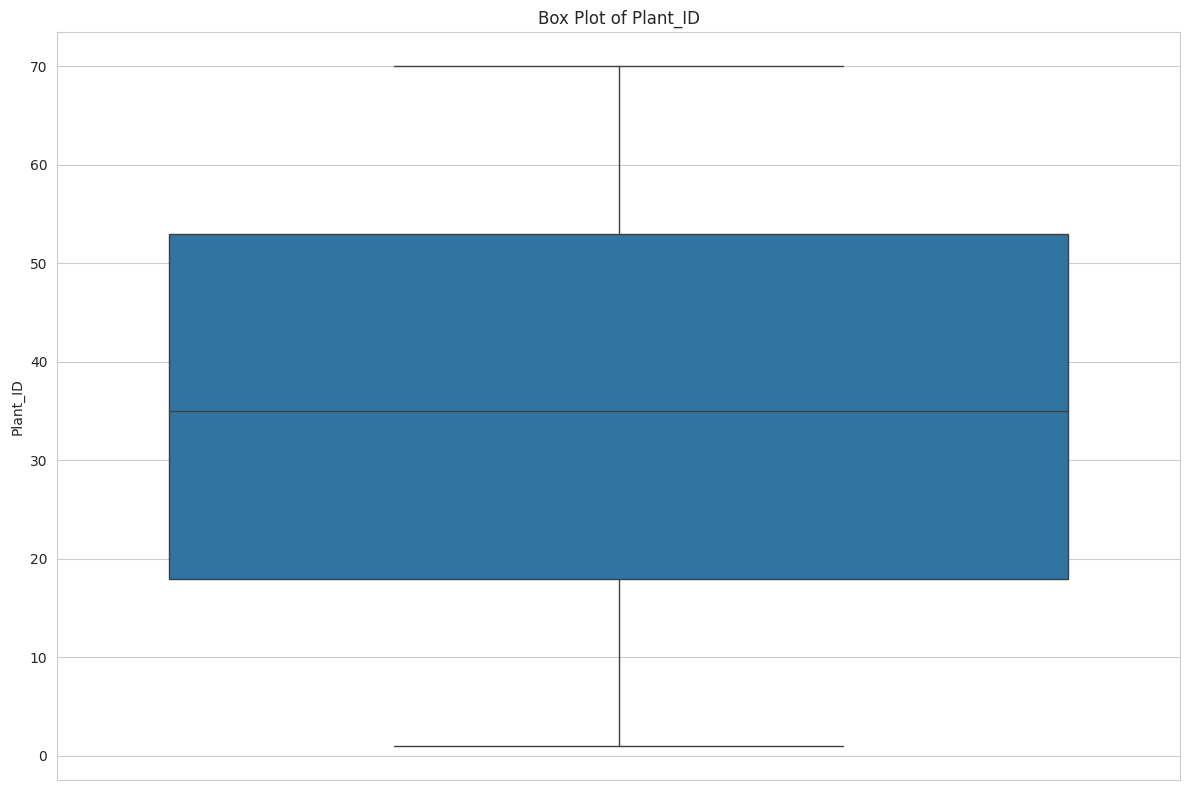

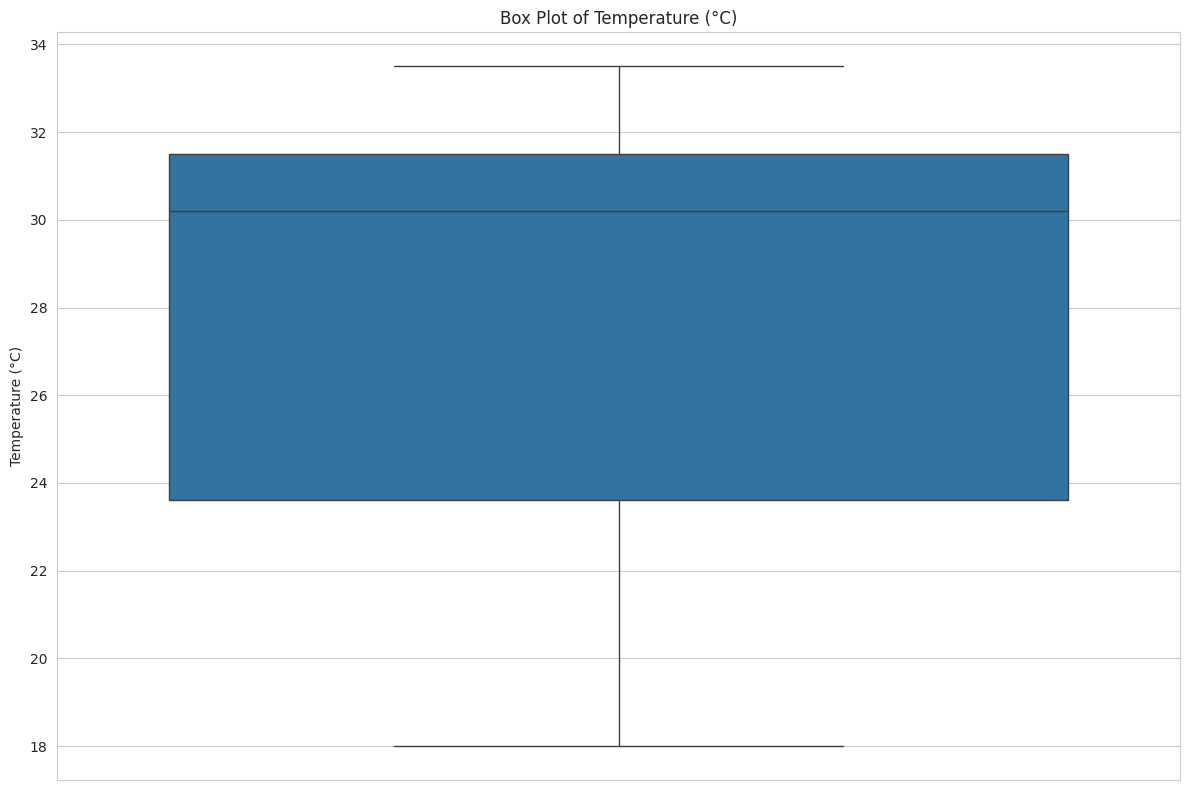

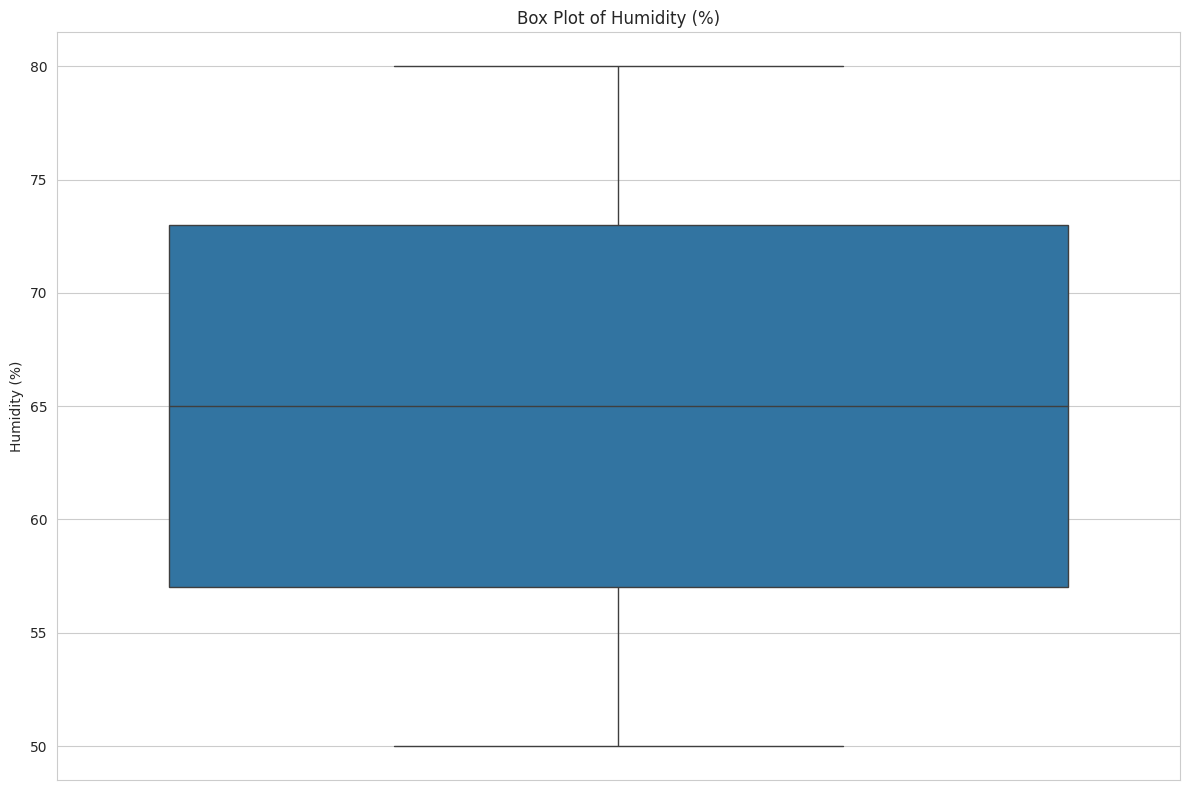

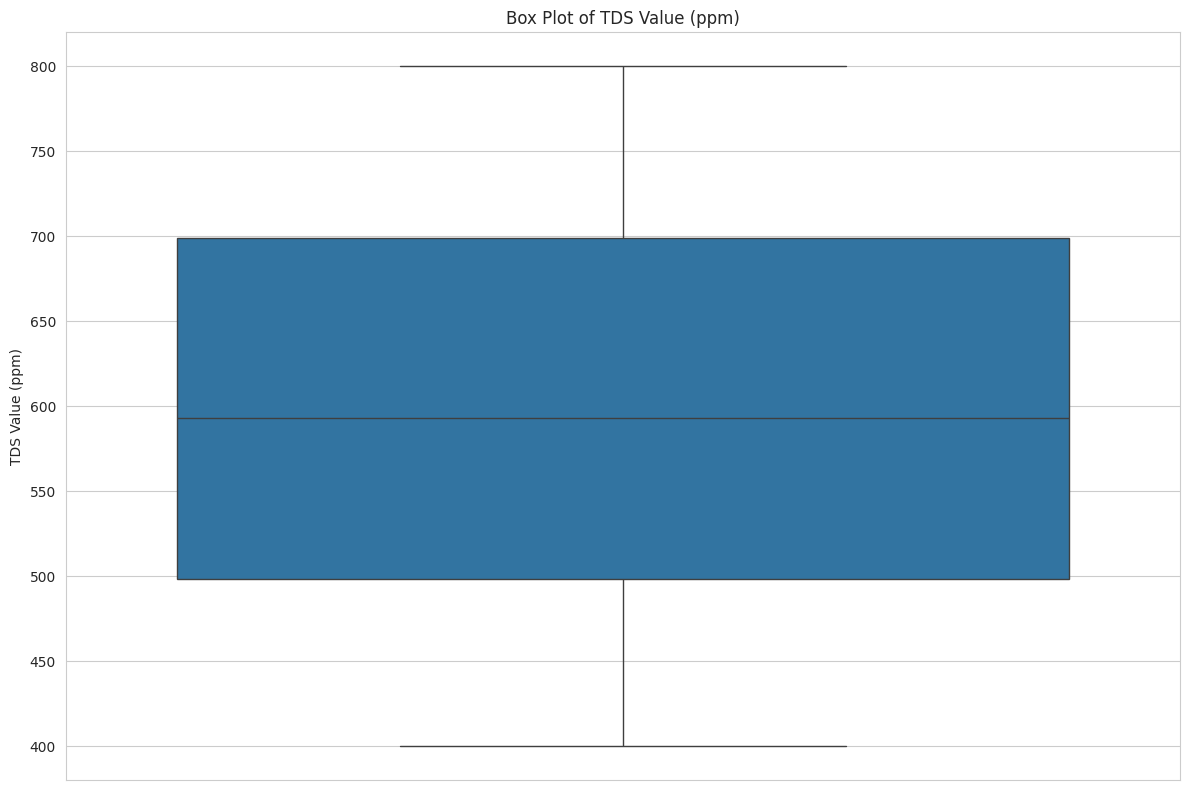

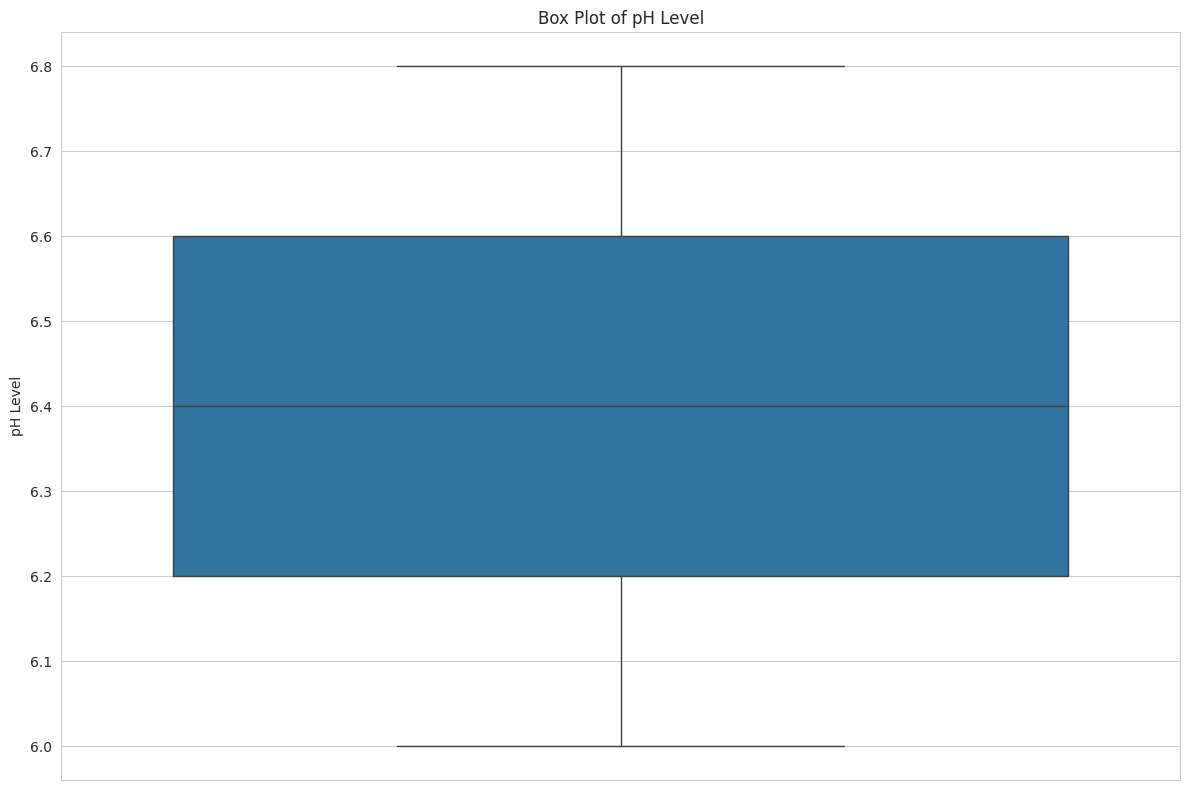

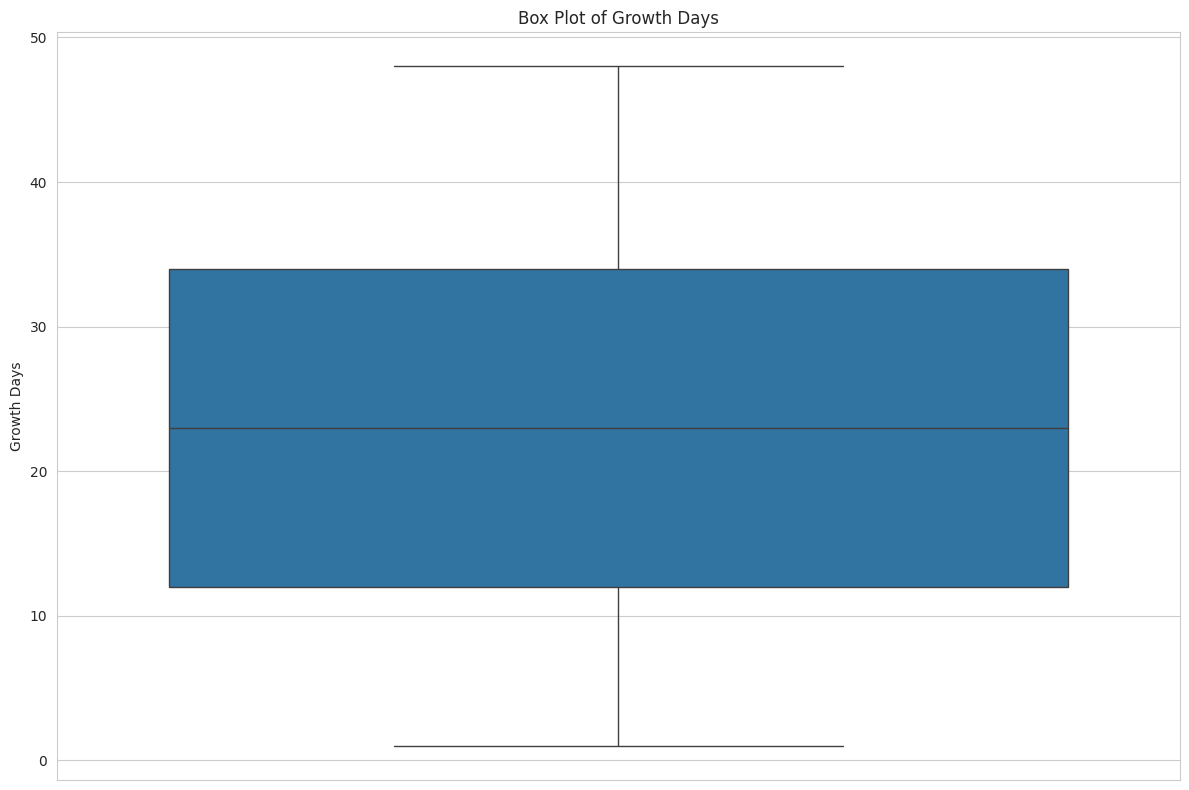


Creating count plots for categorical features...


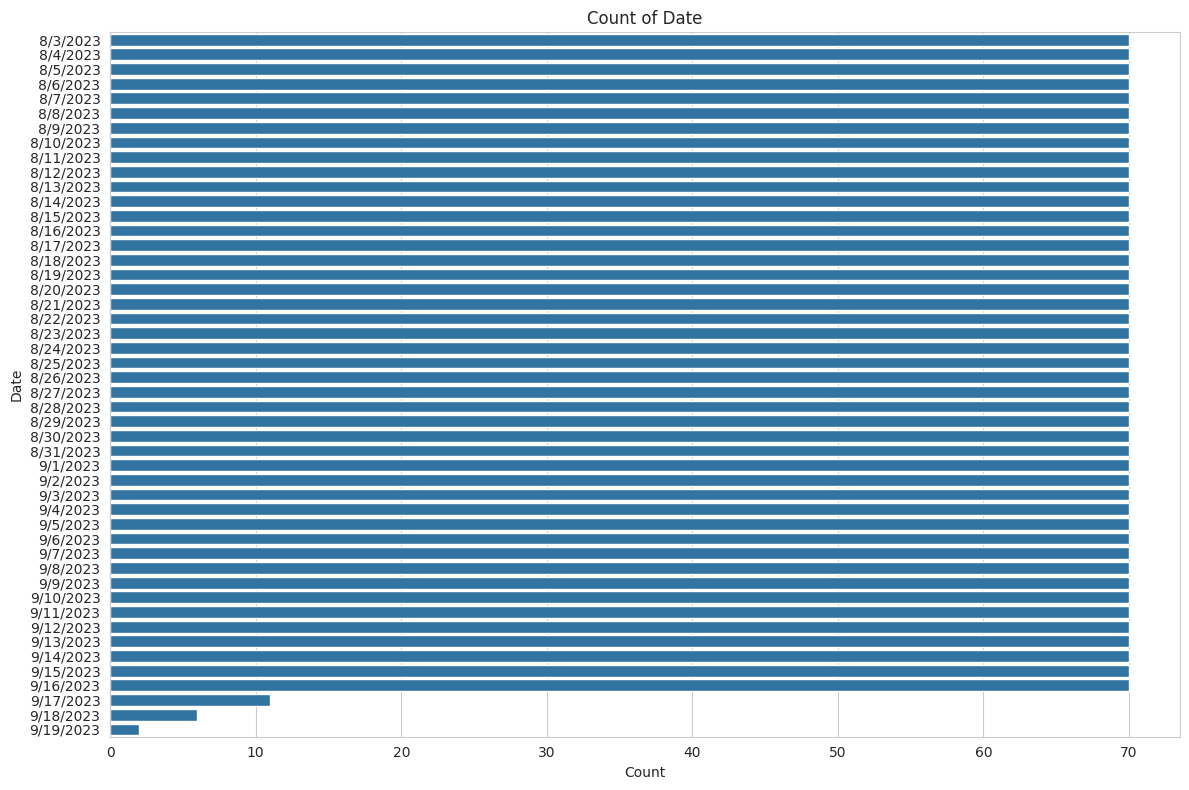


Creating correlation heatmap for numerical features...


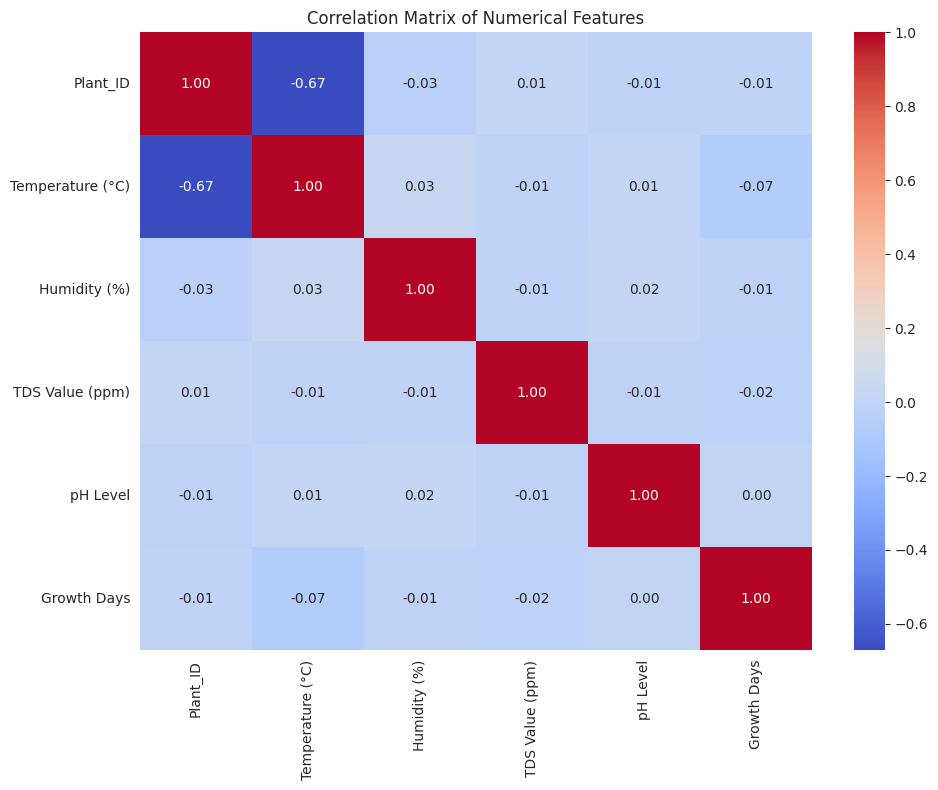


EDA, Data Cleaning, and Visualizations complete!


In [16]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

# --- 1. Load the Dataset ---
print("--- Loading the Dataset ---")
df = pd.read_csv('/Copy of lettuce_dataset - lettuce_dataset.csv.csv')
print("Dataset loaded successfully!")
print(f"Dataset shape: {df.shape}")


# --- 2. Exploratory Data Analysis (EDA) ---
print("\n--- Exploratory Data Analysis (EDA) ---")

# Display the first 5 rows of the DataFrame
print("\nFirst 5 rows of the dataset:")
df.head()

# Get a concise summary of the DataFrame, including data types and non-null values
print("\nDataFrame Info:")
df.info()

# Generate descriptive statistics of the numerical columns
print("\nDescriptive Statistics:")
print(df.describe())

# Check for missing values
print("\nMissing Values per Column:")
print(df.isnull().sum())

# Check for duplicate rows
print("\nNumber of Duplicate Rows:")
print(df.duplicated().sum())

# Identify numerical and categorical columns
numerical_cols = df.select_dtypes(include=np.number).columns.tolist()
categorical_cols = df.select_dtypes(include='object').columns.tolist()

print(f"\nNumerical columns: {numerical_cols}")
print(f"Categorical columns: {categorical_cols}")

# --- 3. Data Cleaning ---
print("\n--- Data Cleaning ---")

# For demonstration, let's assume we'll fill numerical missing values with the median
# and categorical missing values with the mode.
# You might need to adjust this strategy based on your specific dataset and domain knowledge.

# Fill missing numerical values with the median
for col in numerical_cols:
    if df[col].isnull().any():
        median_val = df[col].median()
        df[col].fillna(median_val, inplace=True)
        print(f"Filled missing values in '{col}' with median: {median_val}")

# Fill missing categorical values with the mode
for col in categorical_cols:
    if df[col].isnull().any():
        mode_val = df[col].mode()[0] # .mode() can return multiple if frequencies are tied
        df[col].fillna(mode_val, inplace=True)
        print(f"Filled missing values in '{col}' with mode: {mode_val}")

# Verify no more missing values after cleaning
print("\nMissing Values after Cleaning:")
print(df.isnull().sum())

# If there were duplicate rows, remove them
if df.duplicated().sum() > 0:
    initial_rows = df.shape[0]
    df.drop_duplicates(inplace=True)
    print(f"Removed {initial_rows - df.shape[0]} duplicate rows.")
    print(f"New dataset shape after removing duplicates: {df.shape}")
else:
    print("No duplicate rows found to remove.")

# --- 4. Visualizations ---
print("\n--- Generating Visualizations ---")

# Set style for plots
sns.set_style("whitegrid")
plt.rcParams['figure.figsize'] = (12, 8) # Set default figure size

# Distribution of Numerical Features (Histograms and KDE plots)
print("\nCreating histograms for numerical features...")
for i, col in enumerate(numerical_cols):
    plt.figure(i) # Create a new figure for each plot
    sns.histplot(df[col], kde=True, bins=30)
    plt.title(f'Distribution of {col}')
    plt.xlabel(col)
    plt.ylabel('Frequency')
    plt.tight_layout()
    plt.show()

# Box plots for Numerical Features (to visualize outliers)
print("\nCreating box plots for numerical features (to identify outliers)...")
for i, col in enumerate(numerical_cols):
    plt.figure(len(numerical_cols) + i) # Offset figure numbers
    sns.boxplot(y=df[col])
    plt.title(f'Box Plot of {col}')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Count plots for Categorical Features
print("\nCreating count plots for categorical features...")
for i, col in enumerate(categorical_cols):
    plt.figure(2 * len(numerical_cols) + i) # Offset figure numbers
    sns.countplot(y=df[col], order=df[col].value_counts().index) # Order by frequency
    plt.title(f'Count of {col}')
    plt.xlabel('Count')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

# Correlation Heatmap for Numerical Features
if len(numerical_cols) > 1:
    print("\nCreating correlation heatmap for numerical features...")
    plt.figure(figsize=(10, 8))
    correlation_matrix = df[numerical_cols].corr()
    sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
    plt.title('Correlation Matrix of Numerical Features')
    plt.tight_layout()
    plt.show()
else:
    print("\nNot enough numerical columns to create a correlation heatmap.")

print("\nEDA, Data Cleaning, and Visualizations complete!")


--- Visualizing relationship between Growth Days and other numerical features ---


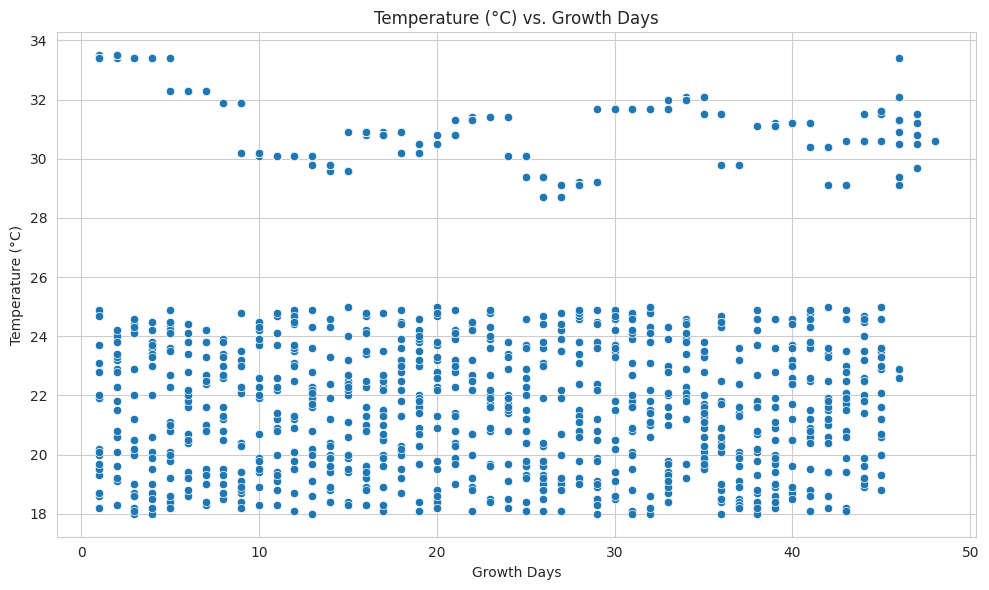

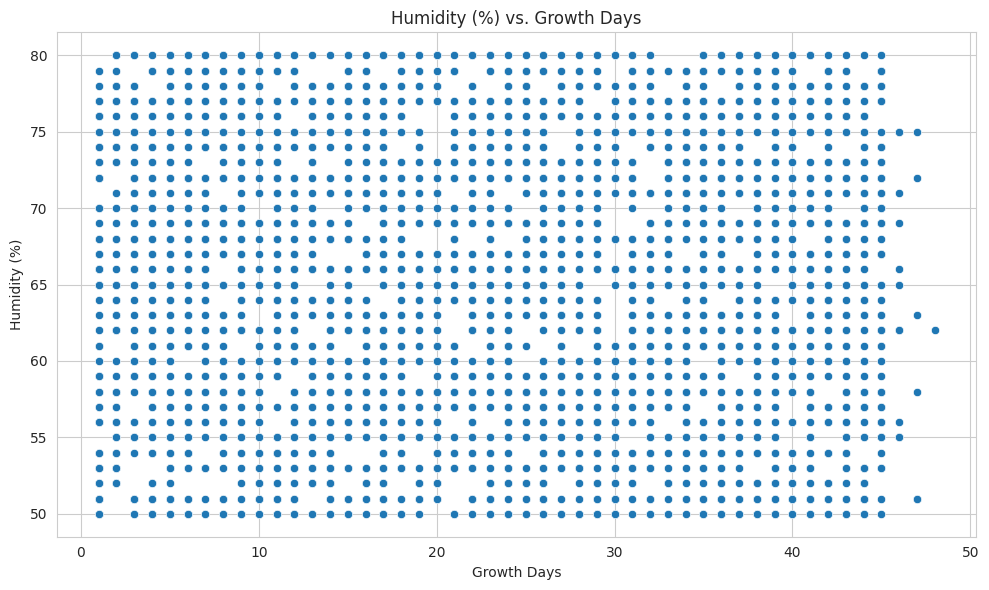

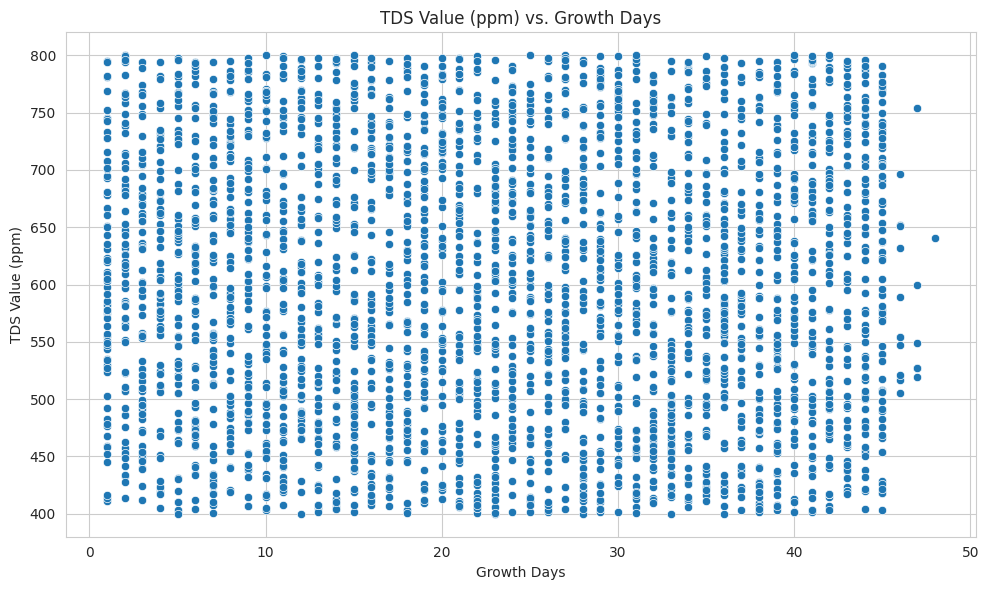

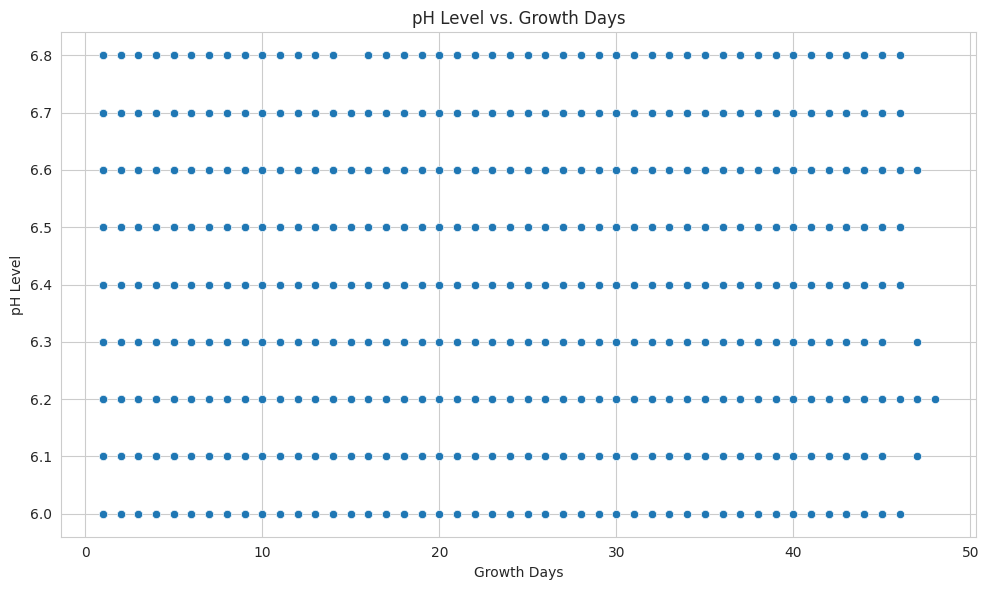


Visualization of relationships complete!


In [17]:
# --- 5. Relationship between Growth Days and other numerical features ---
print("\n--- Visualizing relationship between Growth Days and other numerical features ---")

numerical_cols_without_growth = [col for col in numerical_cols if col != 'Growth Days' and col != 'Plant_ID']

for col in numerical_cols_without_growth:
    plt.figure(figsize=(10, 6))
    sns.scatterplot(data=df, x='Growth Days', y=col)
    plt.title(f'{col} vs. Growth Days')
    plt.xlabel('Growth Days')
    plt.ylabel(col)
    plt.tight_layout()
    plt.show()

print("\nVisualization of relationships complete!")

# Task
Build a predictive model for the 'Growth Days' column using the dataset "/Copy of lettuce_dataset - lettuce_dataset.csv.csv".

## Feature engineering

### Subtask:
Create new features that might be useful for predicting 'Growth Days', such as extracting components from the 'Date' column.


**Reasoning**:
Convert the 'Date' column to datetime objects, extract year, month, and day of the week, create cyclical features for month and day of the week, and then drop the original 'Date' column.



In [18]:
# Convert 'Date' column to datetime objects
df['Date'] = pd.to_datetime(df['Date'])

# Extract year, month, and day of the week
df['Year'] = df['Date'].dt.year
df['Month'] = df['Date'].dt.month
df['Day_of_Week'] = df['Date'].dt.dayofweek # Monday=0, Sunday=6

# Create cyclical features for Month
df['Month_sin'] = np.sin(2 * np.pi * df['Month'] / 12)
df['Month_cos'] = np.cos(2 * np.pi * df['Month'] / 12)

# Create cyclical features for Day of the Week
df['Day_of_Week_sin'] = np.sin(2 * np.pi * df['Day_of_Week'] / 7)
df['Day_of_Week_cos'] = np.cos(2 * np.pi * df['Day_of_Week'] / 7)

# Drop the original 'Date' column
df = df.drop('Date', axis=1)

print("New features created and 'Date' column dropped.")
display(df.head())

New features created and 'Date' column dropped.


,Plant_ID,Temperature (°C),Humidity (%),TDS Value (ppm),pH Level,Growth Days,Year,Month,Day_of_Week,Month_sin,Month_cos,Day_of_Week_sin,Day_of_Week_cos
0,1,33.4,53,582,6.4,1,2023,8,3,-0.866025,-0.5,0.433884,-0.900969
1,1,33.5,53,451,6.1,2,2023,8,4,-0.866025,-0.5,-0.433884,-0.900969
2,1,33.4,59,678,6.4,3,2023,8,5,-0.866025,-0.5,-0.974928,-0.222521
3,1,33.4,68,420,6.4,4,2023,8,6,-0.866025,-0.5,-0.781831,0.623490
4,1,33.4,74,637,6.5,5,2023,8,0,-0.866025,-0.5,0.000000,1.000000


## Data preprocessing

### Subtask:
Prepare the data for the model, which may include scaling numerical features and encoding categorical features.


**Reasoning**:
Prepare the data for modeling by defining features and target, identifying column types, and applying preprocessing using ColumnTransformer.



In [19]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, OneHotEncoder

# 1. Define the feature columns (X) and the target column (y). Exclude 'Plant_ID'.
feature_cols = [col for col in df.columns if col not in ['Growth Days', 'Plant_ID']]
target_col = 'Growth Days'

X = df[feature_cols]
y = df[target_col]

# 2. Identify the numerical and categorical columns among the features.
numerical_cols_features = X.select_dtypes(include=np.number).columns.tolist()
# In this specific dataset, 'Year', 'Month', and 'Day_of_Week' are numerical after extraction,
# but they represent time/calendar components. For this subtask, we will treat them as numerical
# for StandardScaler, as OneHotEncoder is typically for nominal categories.
# The cyclical features (sin/cos) are already numerical.
# The original 'Date' column was categorical ('object') but was dropped.

# Assuming 'Year', 'Month', 'Day_of_Week', 'Month_sin', 'Month_cos', 'Day_of_Week_sin', 'Day_of_Week_cos'
# and the original numerical columns are all treated as numerical features for scaling.
# If there were genuinely categorical features that were not dates, we would list them here.
categorical_cols_features = X.select_dtypes(include='object').columns.tolist() # This list should be empty for this dataset

print(f"Feature columns: {feature_cols}")
print(f"Numerical feature columns: {numerical_cols_features}")
print(f"Categorical feature columns: {categorical_cols_features}")


# 3. Create a ColumnTransformer
# We will apply StandardScaler to all numerical feature columns.
# Since there are no object-type categorical features left after date processing,
# the 'remainder' will be 'passthrough' which is the default, meaning it won't drop the processed columns.
# If we had actual categorical columns, we would add OneHotEncoder here.
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numerical_cols_features)
        # Add ('cat', OneHotEncoder(handle_unknown='ignore'), categorical_cols_features)
        # if there were actual categorical features to encode.
    ],
    remainder='passthrough' # Keep other columns (which should be none in this case)
)


# 4. Fit and transform the features
X_preprocessed = preprocessor.fit_transform(X)

# 5. Display the shape of the preprocessed feature array
print(f"\nShape of preprocessed features: {X_preprocessed.shape}")

Feature columns: ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Year', 'Month', 'Day_of_Week', 'Month_sin', 'Month_cos', 'Day_of_Week_sin', 'Day_of_Week_cos']
Numerical feature columns: ['Temperature (°C)', 'Humidity (%)', 'TDS Value (ppm)', 'pH Level', 'Year', 'Month', 'Day_of_Week', 'Month_sin', 'Month_cos', 'Day_of_Week_sin', 'Day_of_Week_cos']
Categorical feature columns: []

Shape of preprocessed features: (3169, 11)


## Model selection

### Subtask:
Choose appropriate regression models for predicting a continuous variable like 'Growth Days'.


**Reasoning**:
Identify and list suitable regression models for predicting 'Growth Days' and briefly justify their appropriateness.



In [20]:
# --- 6. Choose Regression Models ---
print("\n--- Choosing Regression Models ---")

# List of suitable regression models from scikit-learn
regression_models = {
    "Linear Regression": "A simple and interpretable model that assumes a linear relationship between features and the target. Good as a baseline.",
    "Ridge Regression": "A linear model with L2 regularization. Helps to prevent overfitting by penalizing large coefficients.",
    "Lasso Regression": "A linear model with L1 regularization. Can be used for feature selection by shrinking some coefficients to zero.",
    "ElasticNet Regression": "A linear model with both L1 and L2 regularization. Combines the benefits of Ridge and Lasso.",
    "Decision Tree Regressor": "A non-linear model that splits the data based on feature values. Can capture complex relationships but prone to overfitting.",
    "Random Forest Regressor": "An ensemble of Decision Tree Regressors. Reduces variance and improves robustness compared to a single tree.",
    "Gradient Boosting Regressor (e.g., GradientBoostingRegressor)": "A boosting method that builds trees sequentially, with each tree correcting the errors of the previous ones. Often provides high accuracy.",
    # Other boosting models like XGBoost and LightGBM are also excellent choices but require separate installations.
    # "Support Vector Regressor (SVR)": "A model that finds a hyperplane to fit the data while allowing some error within a margin. Can work well for non-linear relationships using kernels."
}

print("Selected Regression Models and Justification:")
for model_name, justification in regression_models.items():
    print(f"- {model_name}: {justification}")

print("\nChosen models for training and evaluation:")
print(list(regression_models.keys()))


--- Choosing Regression Models ---
Selected Regression Models and Justification:
- Linear Regression: A simple and interpretable model that assumes a linear relationship between features and the target. Good as a baseline.
- Ridge Regression: A linear model with L2 regularization. Helps to prevent overfitting by penalizing large coefficients.
- Lasso Regression: A linear model with L1 regularization. Can be used for feature selection by shrinking some coefficients to zero.
- ElasticNet Regression: A linear model with both L1 and L2 regularization. Combines the benefits of Ridge and Lasso.
- Decision Tree Regressor: A non-linear model that splits the data based on feature values. Can capture complex relationships but prone to overfitting.
- Random Forest Regressor: An ensemble of Decision Tree Regressors. Reduces variance and improves robustness compared to a single tree.
- Gradient Boosting Regressor (e.g., GradientBoostingRegressor): A boosting method that builds trees sequentially, 

## Model training

### Subtask:
Split the data into training and testing sets and train the selected models.


**Reasoning**:
Import necessary libraries, split the data, and train the selected regression models.



In [21]:
from sklearn.linear_model import LinearRegression, Ridge, Lasso, ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.model_selection import train_test_split

# Split the preprocessed data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_preprocessed, y, test_size=0.2, random_state=42)

print(f"Training set shape (features): {X_train.shape}")
print(f"Testing set shape (features): {X_test.shape}")
print(f"Training set shape (target): {y_train.shape}")
print(f"Testing set shape (target): {y_test.shape}")

# Create a dictionary to store the instantiated regression models
regression_models_instances = {
    "Linear Regression": LinearRegression(),
    "Ridge Regression": Ridge(random_state=42),
    "Lasso Regression": Lasso(random_state=42),
    "ElasticNet Regression": ElasticNet(random_state=42),
    "Decision Tree Regressor": DecisionTreeRegressor(random_state=42),
    "Random Forest Regressor": RandomForestRegressor(random_state=42),
    "Gradient Boosting Regressor": GradientBoostingRegressor(random_state=42)
}

# Train the selected models
print("\n--- Training Regression Models ---")
trained_models = {}
for name, model in regression_models_instances.items():
    print(f"Training {name}...")
    model.fit(X_train, y_train)
    trained_models[name] = model
    print(f"{name} trained.")

print("\nModel training complete!")

Training set shape (features): (2535, 11)
Testing set shape (features): (634, 11)
Training set shape (target): (2535,)
Testing set shape (target): (634,)

--- Training Regression Models ---
Training Linear Regression...
Linear Regression trained.
Training Ridge Regression...
Ridge Regression trained.
Training Lasso Regression...
Lasso Regression trained.
Training ElasticNet Regression...
ElasticNet Regression trained.
Training Decision Tree Regressor...
Decision Tree Regressor trained.
Training Random Forest Regressor...
Random Forest Regressor trained.
Training Gradient Boosting Regressor...
Gradient Boosting Regressor trained.

Model training complete!


## Model evaluation

### Subtask:
Evaluate the performance of the trained models using relevant metrics.


**Reasoning**:
Import the necessary metrics for model evaluation and then iterate through the trained models to make predictions and calculate their performance metrics (MSE and R2 score) on the test set.



In [22]:
from sklearn.metrics import mean_squared_error, r2_score

# --- 7. Evaluate Trained Models ---
print("\n--- Evaluating Trained Models ---")

evaluation_results = {}

for name, model in trained_models.items():
    print(f"Evaluating {name}...")
    # Make predictions on the test set
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)

    evaluation_results[name] = {'MSE': mse, 'R2 Score': r2}

    print(f"{name} - MSE: {mse:.4f}, R2 Score: {r2:.4f}")

print("\nModel evaluation complete!")


--- Evaluating Trained Models ---
Evaluating Linear Regression...
Linear Regression - MSE: 55.6725, R2 Score: 0.6778
Evaluating Ridge Regression...
Ridge Regression - MSE: 55.6700, R2 Score: 0.6778
Evaluating Lasso Regression...
Lasso Regression - MSE: 57.0399, R2 Score: 0.6699
Evaluating ElasticNet Regression...
ElasticNet Regression - MSE: 59.5572, R2 Score: 0.6553
Evaluating Decision Tree Regressor...
Decision Tree Regressor - MSE: 33.6467, R2 Score: 0.8053
Evaluating Random Forest Regressor...
Random Forest Regressor - MSE: 17.9154, R2 Score: 0.8963
Evaluating Gradient Boosting Regressor...
Gradient Boosting Regressor - MSE: 16.9276, R2 Score: 0.9020

Model evaluation complete!


## Hyperparameter tuning

### Subtask:
Optimize the model performance by tuning hyperparameters.


**Reasoning**:
Identify the best performing model, define a hyperparameter grid, instantiate and fit GridSearchCV, get the best parameters and score, train the best model, and evaluate it on the test set.



In [23]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_squared_error, r2_score

# 1. Identify the best performing model
# From the previous evaluation results, Gradient Boosting Regressor had the lowest MSE and highest R2.
best_model_name = "Gradient Boosting Regressor"
best_model_instance = GradientBoostingRegressor(random_state=42)

print(f"Best performing model identified: {best_model_name}")

# 2. Define a hyperparameter grid for the best performing model
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

print("\nHyperparameter grid defined for Gradient Boosting Regressor:")
print(param_grid)

# 3. Import GridSearchCV (already imported)

# 4. Instantiate GridSearchCV
# Using 'neg_mean_squared_error' as the scoring metric (GridSearchCV maximizes the score, so we use negative MSE)
# Alternatively, 'r2' could be used. Let's use 'neg_mean_squared_error'.
grid_search = GridSearchCV(estimator=best_model_instance, param_grid=param_grid,
                           scoring='neg_mean_squared_error', cv=5, n_jobs=-1)

print("\nGridSearchCV instantiated with 5-fold cross-validation and 'neg_mean_squared_error' scoring.")


# 5. Fit GridSearchCV to the training data
print("\nFitting GridSearchCV to the training data...")
grid_search.fit(X_train, y_train)
print("GridSearchCV fitting complete.")


# 6. Get the best hyperparameters and the best cross-validation score
best_params = grid_search.best_params_
best_cv_score = grid_search.best_score_

print(f"\nBest hyperparameters found by GridSearchCV: {best_params}")
# Convert the negative MSE back to positive for interpretability
print(f"Best cross-validation MSE (negative): {best_cv_score:.4f}")
print(f"Best cross-validation MSE (positive): {-best_cv_score:.4f}")

# 7. Train a new instance of the best performing model using the best hyperparameters
tuned_model = GradientBoostingRegressor(**best_params, random_state=42)

print(f"\nTraining the tuned model with best hyperparameters: {best_params}")
tuned_model.fit(X_train, y_train)
print("Tuned model training complete.")

# 8. Evaluate the performance of the tuned model on the test set
print("\nEvaluating the tuned model on the test set...")
y_pred_tuned = tuned_model.predict(X_test)

mse_tuned = mean_squared_error(y_test, y_pred_tuned)
r2_tuned = r2_score(y_test, y_pred_tuned)

print(f"Tuned Gradient Boosting Regressor - MSE: {mse_tuned:.4f}, R2 Score: {r2_tuned:.4f}")

# Compare with the untuned model's performance
untuned_mse = evaluation_results[best_model_name]['MSE']
untuned_r2 = evaluation_results[best_model_name]['R2 Score']

print("\nComparison with Untuned Model:")
print(f"Untuned {best_model_name} - MSE: {untuned_mse:.4f}, R2 Score: {untuned_r2:.4f}")
print(f"Tuned {best_model_name} - MSE: {mse_tuned:.4f}, R2 Score: {r2_tuned:.4f}")

Best performing model identified: Gradient Boosting Regressor

Hyperparameter grid defined for Gradient Boosting Regressor:
{'n_estimators': [100, 200, 300], 'learning_rate': [0.01, 0.05, 0.1], 'max_depth': [3, 4, 5], 'min_samples_split': [2, 5, 10]}

GridSearchCV instantiated with 5-fold cross-validation and 'neg_mean_squared_error' scoring.

Fitting GridSearchCV to the training data...
GridSearchCV fitting complete.

Best hyperparameters found by GridSearchCV: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Best cross-validation MSE (negative): -17.9145
Best cross-validation MSE (positive): 17.9145

Training the tuned model with best hyperparameters: {'learning_rate': 0.05, 'max_depth': 5, 'min_samples_split': 2, 'n_estimators': 100}
Tuned model training complete.

Evaluating the tuned model on the test set...
Tuned Gradient Boosting Regressor - MSE: 16.6856, R2 Score: 0.9034

Comparison with Untuned Model:
Untuned Gradient Boosting Regressor - MS

## Prediction and interpretation

### Subtask:
Use the best model to make predictions and interpret the results.


**Reasoning**:
Use the tuned model to make predictions, create a dataframe with actual and predicted values and residuals, display the head of the dataframe, and then visualize the distribution of residuals and the relationship between residuals and actual values.




--- Actual vs. Predicted Growth Days and Residuals ---


,Actual Growth Days,Predicted Growth Days,Residuals
254,25,16.338302,8.661698
3162,40,36.549131,3.450869
969,14,15.113379,-1.113379
940,30,30.134726,-0.134726
331,10,13.026446,-3.026446



--- Analyzing Residuals ---


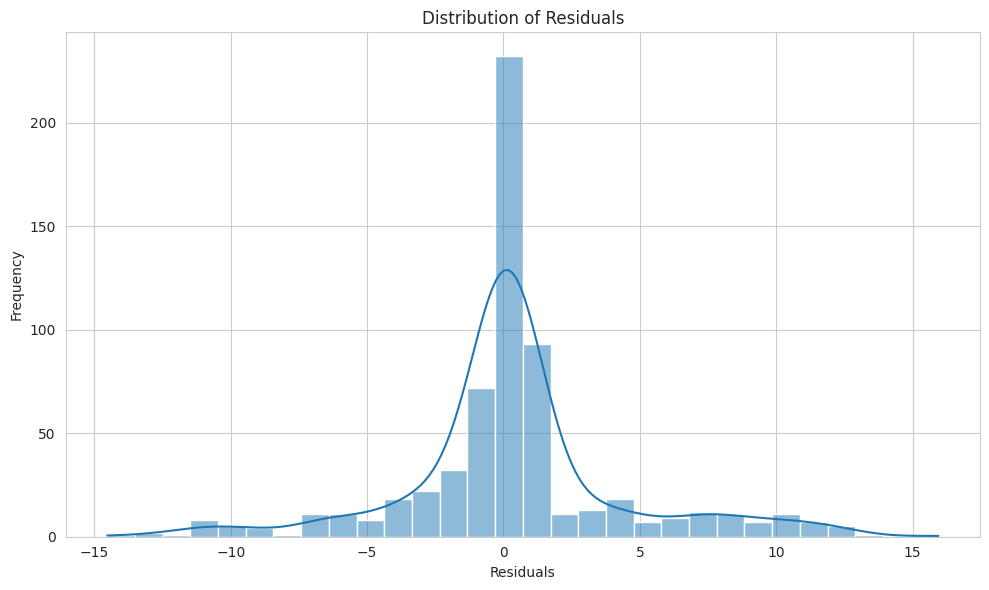

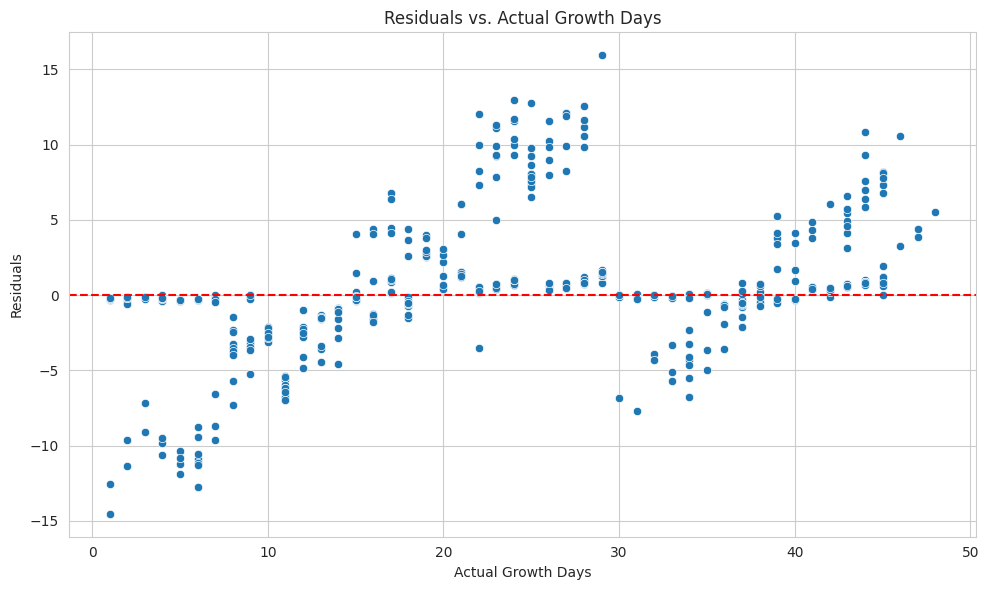


Residual analysis visualizations complete.


In [24]:
# 1. Use the tuned_model to make predictions on the X_test dataset.
y_pred_tuned = tuned_model.predict(X_test)

# 2. Create a pandas DataFrame that includes the actual and predicted values.
predictions_df = pd.DataFrame({
    'Actual Growth Days': y_test,
    'Predicted Growth Days': y_pred_tuned
})

# 3. Add a column for residuals.
predictions_df['Residuals'] = predictions_df['Actual Growth Days'] - predictions_df['Predicted Growth Days']

# 4. Display the first few rows.
print("\n--- Actual vs. Predicted Growth Days and Residuals ---")
display(predictions_df.head())

# 5. Analyze the residuals visually.
print("\n--- Analyzing Residuals ---")

# Histogram of Residuals
plt.figure(figsize=(10, 6))
sns.histplot(predictions_df['Residuals'], kde=True, bins=30)
plt.title('Distribution of Residuals')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()

# Scatter plot of Residuals vs. Actual Growth Days
plt.figure(figsize=(10, 6))
sns.scatterplot(data=predictions_df, x='Actual Growth Days', y='Residuals')
plt.axhline(0, color='red', linestyle='--') # Add a horizontal line at y=0
plt.title('Residuals vs. Actual Growth Days')
plt.xlabel('Actual Growth Days')
plt.ylabel('Residuals')
plt.tight_layout()
plt.show()

# 6. Discuss implications (This will be done in the final summary)
print("\nResidual analysis visualizations complete.")